# Introduction

For this project I chose the a data set from Kaggle called "no-show-appointments' that is a record of one month of doctors appointments in Brazil. The dataset has many columns with various pieces of data. My goal is to find the percentage of missed appointments in each neighborhood and graph them, grouping the top 10 and bottom 10 (most missed appointments by percentage and least missed appointments by percentage). I will also find what percentage of appointments were missed grouped by whether or not the patients were enrolled in the "Scholarship" program, suffered from Hipertension, suffered from Diabetes, or suffered from Alcoholism. 


I chose not to work on the "handcap" column as it has a significant number of values that are not 1 or 0 and there is no reference to what the values 2, 3, or 4 signify, thus I will omit them from my investigation. I will note that in a real life scenario it would be possible to remove the rows with values that are not 1 or 0 and work on that amended column and note that there were some discrepancies in the original data for that column.

The last part of my investigation will be to find the spread of ages for the patients in this dataset. 

# Percentage of Missed Appointments by Neighbourhood

First, I will import all the necessary packages and import the csv file and take a look at the head of the dataframe.

In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [113]:
df_original = pd.read_csv('noshow.csv')
df_original.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


At this point I need to check for null values. I will check the shape of the data frame so I can see the total number of rows, the number of unique neighbourhood names and make sure that the number of non-null values match the number of rows for each column.

In [114]:
df_original.shape

(110527, 14)

In [115]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


It appears there are no null values in any of the columns. I will now dive deeper to see if there are any irregularities that need to be wrangled/cleaned.

In [116]:
df_original.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.920000e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172615e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173180e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439170e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999820e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


It appears there is at least one row in which the 'Age' value is less than 0, which is not possible. 

In [117]:
# locate any rows in the 'Age' column that are not viable (less than 0)
df_original.loc[df_original['Age'] < 0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659430e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


There is only one row that has a value in the 'Age' column that is not viable. I will remove the row as removing it will hardly affect my investigation. 

In [118]:
# select all rows that have viable ages (represented by years)
df_original = df_original.loc[(df_original["Age"] >= 0)]

In [119]:
# check to make sure that the minimum value in 'Age' is now 0
df_original.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.920000e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172538e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173180e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438960e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999820e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [120]:
# check the shape to ensure that only one row was removed (110527 in df_original; should now be 110526)
df_original.shape

(110526, 14)

The only columns I am concerned with at the moment are the 'Neighbourhood' and 'No-show' columns. I will create a new data frame with the superfluous columns dropped.

In [121]:
cols = ['Neighbourhood', 'No-show']
df_neighbourhood_noshow = df_original[cols]
df_neighbourhood_noshow.head()

,Neighbourhood,No-show
0,JARDIM DA PENHA,No
1,JARDIM DA PENHA,No
2,MATA DA PRAIA,No
3,PONTAL DE CAMBURI,No
4,JARDIM DA PENHA,No


Now it is necessary to check the shape to ensure all the rows are in the new data frame and also to ensure that there are no null values in the new data frame.

In [122]:
# check shape to ensure correct row count
df_neighbourhood_noshow.shape

(110526, 2)

In [123]:
# check info to ensure no null values
df_neighbourhood_noshow.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Neighbourhood  110526 non-null  object
 1   No-show        110526 non-null  object
dtypes: object(2)
memory usage: 2.5+ MB


In [124]:
# see how many different neighbourhood names there are
df_neighbourhood_noshow['Neighbourhood'].nunique()

81

The following few steps will use the 'groupby' function to obtain the neighbourhoods and their respective 'Yes' and 'No' counts. This information will be used to obtain totals for each neighbourhood in order to calculate the No-Show Percentage for each neighbourhood. Two new columns will be calculated and added, 'Total' and 'Percentage No-Show'. At that point the data frame will be sorted by 'No-Show Percentage' in order to be able to identify the top 10 and bottom 10 neighbourhoods.

In [125]:
# create new data frame grouped by Neighbourhood and No-Show obtaining counts and columns for Yes and No
# note that there are 81 rows which match up with the number of unique "Neighbourhoods" obtained in the cell above
df_unstacked = df_neighbourhood_noshow.groupby(['Neighbourhood', 'No-show'])['No-show'].count().unstack(fill_value=0)
df_unstacked

No-show,No,Yes
Neighbourhood,,
AEROPORTO,7,1
ANDORINHAS,1741,521
ANTÔNIO HONÓRIO,221,50
ARIOVALDO FAVALESSA,220,62
BARRO VERMELHO,332,91
...,...,...
SÃO JOSÉ,1549,428
SÃO PEDRO,1933,515
TABUAZEIRO,2559,573


In [126]:
# reset the index so that 'Neighbourhood' is a column and not the index
df_unstacked.reset_index(inplace=True)
df_unstacked

No-show,Neighbourhood,No,Yes
0,AEROPORTO,7,1
1,ANDORINHAS,1741,521
2,ANTÔNIO HONÓRIO,221,50
3,ARIOVALDO FAVALESSA,220,62
4,BARRO VERMELHO,332,91
...,...,...,...
76,SÃO JOSÉ,1549,428
77,SÃO PEDRO,1933,515
78,TABUAZEIRO,2559,573
79,UNIVERSITÁRIO,120,32


In [127]:
# create new column calculating the total number of No's and Yes' in order to calculate percentage
df_unstacked['Total'] = df_unstacked['No'] + df_unstacked['Yes']

In [128]:
# create new column using the 'Total' column and 'Yes' column to obtain the percentage No-Show for each neighbourhood
df_unstacked['Percentage No-Show'] =round(((df_unstacked['Yes'] / df_unstacked['Total']) * 100), 2)

In [129]:
# view the data frame to ensure it was created correctly with all values needed
df_unstacked

No-show,Neighbourhood,No,Yes,Total,Percentage No-Show
0,AEROPORTO,7,1,8,12.50
1,ANDORINHAS,1741,521,2262,23.03
2,ANTÔNIO HONÓRIO,221,50,271,18.45
3,ARIOVALDO FAVALESSA,220,62,282,21.99
4,BARRO VERMELHO,332,91,423,21.51
...,...,...,...,...,...
76,SÃO JOSÉ,1549,428,1977,21.65
77,SÃO PEDRO,1933,515,2448,21.04
78,TABUAZEIRO,2559,573,3132,18.30
79,UNIVERSITÁRIO,120,32,152,21.05


In [130]:
# sort the values of the data frame so it is possible to obtain the top and bottom 10 neighbourhoods by percentage, respectively
df_unstacked.sort_values(by=['Percentage No-Show'], inplace=True)

In [131]:
# create new data frame with the 10 highest No-Show percentage
top_ten = df_unstacked.tail(10)
top_ten.head()

No-show,Neighbourhood,No,Yes,Total,Percentage No-Show
1,ANDORINHAS,1741,521,2262,23.03
9,CARATOÍRA,1974,591,2565,23.04
33,ILHA DO PRÍNCIPE,1734,532,2266,23.48
28,HORTO,133,42,175,24.00
40,JESUS DE NAZARETH,2157,696,2853,24.40


In [132]:
# create new data frame with the 10 lowest No-Show percentage
bottom_ten = df_unstacked.head(10)
bottom_ten.head()

No-show,Neighbourhood,No,Yes,Total,Percentage No-Show
51,PARQUE INDUSTRIAL,1,0,1,0.00
31,ILHA DO BOI,32,3,35,8.57
0,AEROPORTO,7,1,8,12.50
48,MÁRIO CYPRESTE,317,54,371,14.56
73,SOLON BORGES,400,69,469,14.71


Now that we have 2 new data frames with the top 10 and bottom 10 'Neighbourhoods' by 'No-Show Percentage' we will use a bar graph to represent those numbers visually.

No-show,Neighbourhood,No,Yes,Total,Percentage No-Show
51,PARQUE INDUSTRIAL,1,0,1,0.00
31,ILHA DO BOI,32,3,35,8.57
0,AEROPORTO,7,1,8,12.50
48,MÁRIO CYPRESTE,317,54,371,14.56
73,SOLON BORGES,400,69,469,14.71
16,DE LOURDES,258,47,305,15.41
17,DO CABRAL,472,88,560,15.71
66,SANTA MARTHA,2635,496,3131,15.84
39,JARDIM DA PENHA,3246,631,3877,16.28
19,DO QUADRO,709,140,849,16.49


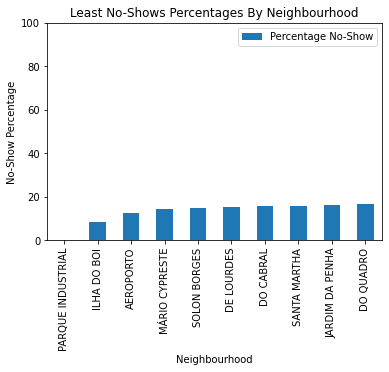

In [133]:
# plot bar graphs for Top Ten and Bottom Ten
bottom_ten.plot(kind='bar', x='Neighbourhood', y='Percentage No-Show')
plt.ylim(0, 100)
plt.title("Least No-Shows Percentages By Neighbourhood")
plt.xlabel("Neighbourhood")
plt.ylabel("No-Show Percentage");
bottom_ten


No-show,Neighbourhood,No,Yes,Total,Percentage No-Show
1,ANDORINHAS,1741,521,2262,23.03
9,CARATOÍRA,1974,591,2565,23.04
33,ILHA DO PRÍNCIPE,1734,532,2266,23.48
28,HORTO,133,42,175,24.00
40,JESUS DE NAZARETH,2157,696,2853,24.40
36,ITARARÉ,2591,923,3514,26.27
62,SANTA CLARA,372,134,506,26.48
61,SANTA CECÍLIA,325,123,448,27.46
70,SANTOS DUMONT,907,369,1276,28.92
34,ILHAS OCEÂNICAS DE TRINDADE,0,2,2,100.00


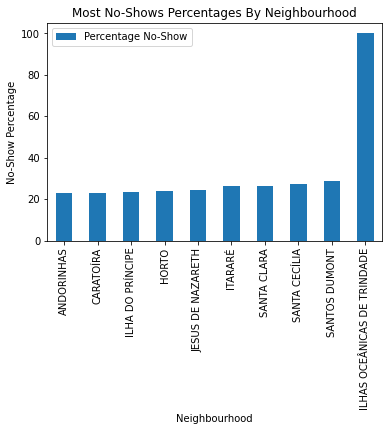

In [134]:
top_ten.plot(kind='bar', x='Neighbourhood', y='Percentage No-Show')
plt.title("Most No-Shows Percentages By Neighbourhood")
plt.xlabel("Neighbourhood")
plt.ylabel("No-Show Percentage");
top_ten

## Section Conclusions

With our new information and visual representation, we can see the top ten(most missed appointment percent) and the bottom ten(least missed appointments percent). The 0% for 'Parque Industrial' in the bottom ten and the 100% for 'Ilhas Oceanicas de Trindade' are most likely outliers and in a real world situation those neighbourhoods would likely be removed from the investigation. 

Considering the outliers, we can see that the top ten neighbourhoods start at just about 23% and go up to almost 29% appointments missed (the 100% outlier omitted). For the bottom ten neighbourhoods we can see they start at just over 8.5% and go up to almost 16.5% missed appointments (0% outlier omitted). 

# Condition Totals and No-Show Percentages By Condition

At this point we dig deeper into the data set in order to find out what percent of the sample suffers from one of the 'Conditions' of Hipertension, Diabetes, Alcoholism, and whether they or not they are enrolled in the 'Scholarship' program. I will also calculate what is the percentage of No-Shows by 'Condition' and represent that graphically.

In [135]:
# The unedited version of the csv file has already been imported and I will just reference back to that original import data
# frame, after the issue with the age column has been cleaned, and cull the necessary columns from the unedited version to 
# create a new data frame to work with

cols2 = ['Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'No-show']
df_subset = df_original[cols2]
df_subset.head()

,Scholarship,Hipertension,Diabetes,Alcoholism,No-show
0,0,1,0,0,No
1,0,0,0,0,No
2,0,0,0,0,No
3,0,0,0,0,No
4,0,1,1,0,No


In [136]:
# replace the 0's and 1's with 'No' and 'Yes' to improve readability of data frame
df_subset = df_subset.replace({1: 'Yes', 0: 'No'})

In [137]:
# ensure that replacement has occured successfully
df_subset.head()

,Scholarship,Hipertension,Diabetes,Alcoholism,No-show
0,No,Yes,No,No,No
1,No,No,No,No,No
2,No,No,No,No,No
3,No,No,No,No,No
4,No,Yes,Yes,No,No


In [138]:
# check the new subset dataframe for irregularities
df_subset.describe()

,Scholarship,Hipertension,Diabetes,Alcoholism,No-show
count,110526,110526,110526,110526,110526
unique,2,2,2,2,2
top,No,No,No,No,No
freq,99665,88725,102583,107166,88207


In [139]:
# create 4 new data frames with for each condition
df_scholarship = df_subset.groupby(['Scholarship', 'No-show'])['No-show'].count().unstack(fill_value=0)
df_hipertension = df_subset.groupby(['Hipertension', 'No-show'])['No-show'].count().unstack(fill_value=0)
df_diabetes = df_subset.groupby(['Diabetes', 'No-show'])['No-show'].count().unstack(fill_value=0)
df_alcoholism = df_subset.groupby(['Alcoholism', 'No-show'])['No-show'].count().unstack(fill_value=0)

In [140]:
# reset the index of each data frame so the 'conditon' is a graphable column and not an index
df_scholarship.reset_index(inplace=True)
df_hipertension.reset_index(inplace=True)
df_diabetes.reset_index(inplace=True)
df_alcoholism.reset_index(inplace=True)

In [141]:
# rename the 'No' and "Yes" columns to avoid confusion 
df_scholarship = df_scholarship.rename(columns={'No': 'Did Show', 'Yes': "Didn't Show"})
df_hipertension = df_hipertension.rename(columns={'No': 'Did Show', 'Yes': "Didn't Show"})
df_diabetes = df_diabetes.rename(columns={'No': 'Did Show', 'Yes': "Didn't Show"})
df_alcoholism = df_alcoholism.rename(columns={'No': 'Did Show', 'Yes': "Didn't Show"})

In [142]:
# I will define a function to create the calculated columns using the information from the cells above
def calculate_columns(dataframe, calc_column1, calc_column2):
    dataframe[calc_column1] = dataframe['Did Show'] + dataframe["Didn't Show"]
    dataframe[calc_column2] = round(((dataframe["Didn't Show"] / dataframe[calc_column1]) * 100), 2)
    dataframe.reset_index(inplace=True)
    return dataframe

In [143]:
calculate_columns(df_scholarship, 'Total', 'Percent Missed Appointment')
calculate_columns(df_hipertension, 'Total', 'Percent Missed Appointment')
calculate_columns(df_diabetes, 'Total', 'Percent Missed Appointment')
calculate_columns(df_alcoholism, 'Total', 'Percent Missed Appointment')

No-show,index,Alcoholism,Did Show,Didn't Show,Total,Percent Missed Appointment
0,0,No,85524,21642,107166,20.19
1,1,Yes,2683,677,3360,20.15


In the next few cells I will view each new data frame to ensure it was created correctly and ready to be graphed.

In [144]:
# check data frame for successful creation
df_scholarship

No-show,index,Scholarship,Did Show,Didn't Show,Total,Percent Missed Appointment
0,0,No,79924,19741,99665,19.81
1,1,Yes,8283,2578,10861,23.74


In [145]:
# check data frame for successful creation
df_hipertension

No-show,index,Hipertension,Did Show,Didn't Show,Total,Percent Missed Appointment
0,0,No,70178,18547,88725,20.9
1,1,Yes,18029,3772,21801,17.3


In [146]:
# check data frame for successful creation
df_diabetes

No-show,index,Diabetes,Did Show,Didn't Show,Total,Percent Missed Appointment
0,0,No,81694,20889,102583,20.36
1,1,Yes,6513,1430,7943,18.00


In [147]:
# check data frame for successful creation
df_alcoholism

No-show,index,Alcoholism,Did Show,Didn't Show,Total,Percent Missed Appointment
0,0,No,85524,21642,107166,20.19
1,1,Yes,2683,677,3360,20.15


No-show,index,Scholarship,Did Show,Didn't Show,Total,Percent Missed Appointment
0,0,No,79924,19741,99665,19.81
1,1,Yes,8283,2578,10861,23.74


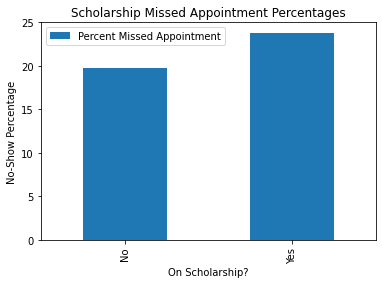

In [148]:
# graph the scholarship data
df_scholarship.plot(kind='bar', x='Scholarship', y='Percent Missed Appointment')
plt.ylim(0, 25)
plt.title("Scholarship Missed Appointment Percentages")
plt.xlabel("On Scholarship?")
plt.ylabel("No-Show Percentage");
df_scholarship

No-show,index,Hipertension,Did Show,Didn't Show,Total,Percent Missed Appointment
0,0,No,70178,18547,88725,20.9
1,1,Yes,18029,3772,21801,17.3


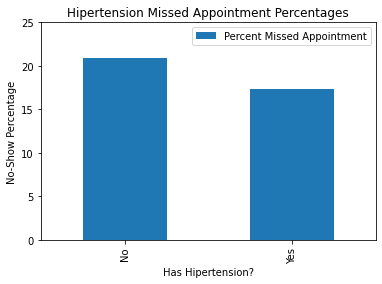

In [149]:
# graph the hipertension data
df_hipertension.plot(kind='bar', x='Hipertension', y='Percent Missed Appointment')
plt.ylim(0, 25)
plt.title("Hipertension Missed Appointment Percentages")
plt.xlabel("Has Hipertension?")
plt.ylabel("No-Show Percentage");
df_hipertension

No-show,index,Diabetes,Did Show,Didn't Show,Total,Percent Missed Appointment
0,0,No,81694,20889,102583,20.36
1,1,Yes,6513,1430,7943,18.00


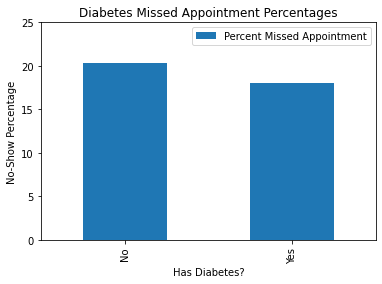

In [150]:
# graph the diabetes data
df_diabetes.plot(kind='bar', x='Diabetes', y='Percent Missed Appointment')
plt.ylim(0, 25)
plt.title("Diabetes Missed Appointment Percentages")
plt.xlabel("Has Diabetes?")
plt.ylabel("No-Show Percentage");
df_diabetes

No-show,index,Alcoholism,Did Show,Didn't Show,Total,Percent Missed Appointment
0,0,No,85524,21642,107166,20.19
1,1,Yes,2683,677,3360,20.15


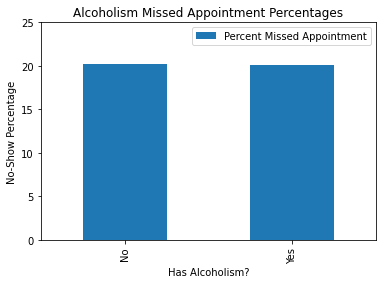

In [151]:
# graph the alcoholism data
df_alcoholism.plot(kind='bar', x='Alcoholism', y='Percent Missed Appointment')
plt.ylim(0, 25)
plt.title("Alcoholism Missed Appointment Percentages")
plt.xlabel("Has Alcoholism?")
plt.ylabel("No-Show Percentage");
df_alcoholism

From the 'scholarship', 'hipertension', 'diabetes', and 'alcholism' data frames we created above, we are able to glean the total patients that suffer from each 'condition' in the calculated 'Total' column (the second row 'Total'). They are as follows:
Scholarship - 10861
Hipertension - 21801
Diabetes - 7943
Alcoholism - 3360

We know that the total number of rows/appointments/patients is 110526. With this information we can create a new dataframe with the percentage of people that suffer from each 'condition' and graph that.

In [152]:
# create list of totals and a list for conditions and create a new data frame 

totals_list = [10861, 21801, 7943, 3360]
conditions_list =['Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism']

conditions_percentage = pd.DataFrame(columns= ['Condition', 'People w/ Condition', 'Total Patients', 'Percentage of Total w/ Condition'])

In [153]:
# create columns with our known values and a calculated column representing percentage of sample that suffers from 'condition'
conditions_percentage['Condition'] = conditions_list
conditions_percentage['People w/ Condition'] = totals_list
conditions_percentage['Total Patients'] = 110526
conditions_percentage['Percentage of Total w/ Condition'] = round(((conditions_percentage['People w/ Condition'] / conditions_percentage['Total Patients']) * 100), 2)

In [154]:
# view data frame to ensure it was created correctly
conditions_percentage

,Condition,People w/ Condition,Total Patients,Percentage of Total w/ Condition
0,Scholarship,10861,110526,9.83
1,Hipertension,21801,110526,19.72
2,Diabetes,7943,110526,7.19
3,Alcoholism,3360,110526,3.04


,Condition,People w/ Condition,Total Patients,Percentage of Total w/ Condition
0,Scholarship,10861,110526,9.83
1,Hipertension,21801,110526,19.72
2,Diabetes,7943,110526,7.19
3,Alcoholism,3360,110526,3.04


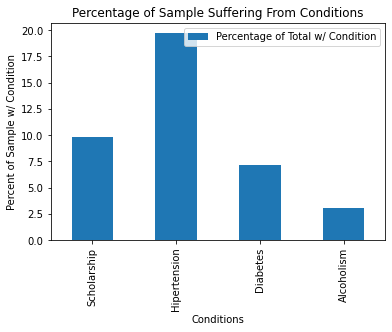

In [155]:
# graph the data frame
conditions_percentage.plot(kind='bar', x='Condition', y='Percentage of Total w/ Condition')
plt.title('Percentage of Sample Suffering From Conditions')
plt.xlabel("Conditions")
plt.ylabel("Percent of Sample w/ Condition");
conditions_percentage

## Section Conclusions

We can see that the most missed appointments come from those who are enrolled in the 'Scholarship' Program(23.74%), by over 3% compared to the second most missed appointment percentage, alcoholism (20.15%). 

Those that suffer from alcoholism actually miss the appointments less than those that don't according to this data, but by only a miniscule margin (20.15% and 20.19%, respectively). 

Those suffering from diabetes have a lower missed appointment percentage (18.00%) compared to those who do not suffer from diabetes(20.36%). 

The same is true about those suffering from hipertension, who, according to this data, miss their appointments 17.3% percent of the time compared to 20.9% for those who do not suffer from hipertension. 

Those who are enrolled in the 'Scholarship' program miss their appointments 23.74% compared to 19.81% for those who are not enrolled in the program. 

It is also clear that the most commonly suffered ailment of those ailments that were measured is hipertension by a fairly large margin, just under 10%. 

Of the patients considered in this study, alcoholism is least common ailment with just over 3% of the sample population suffering from that ailment. 

Diabetes comes in 2nd of ailments measured at just over 7%.

Almost 10% (9.83%) of patients surveyed in this study are enrolled in the 'Scholarship' program.

People on the 'Scholarship' program had roughly a 5% higher no-show rate than those not on the 'Scholarship' program.
People suffering from 'Hipertension' had roughly a 3% lower no-show rate than those who did not have 'Hipertension.'
People suffering from 'Diabetes' had roughly a 2% lower no-show rate than those who did not have 'Diabetes.'
People who suffer from 'Alcoholism' had an almost even no-show rate compared to those who do not suffer from 'Alcoholism.'

# Age Distribution

Finally, I will use a box-plot to visually represent the ages of the people represented in the survey.

In [156]:
age_col = ['Age']
df_age = df_original[age_col]
df_age

,Age
0,62
1,56
2,62
3,8
4,56
...,...
110522,56
110523,51
110524,21
110525,38


In [157]:
# use the information gleaned from the .describe() to create a list that will be used to create a new data frame; 
# the values we need are min, 25%, 50%, 75%, and max. These values will allow us to create a boxplot to represent the data
# visually
df_age.describe()

,Age
count,110526.000000
mean,37.089219
std,23.110026
min,0.000000
25%,18.000000
50%,37.000000
75%,55.000000
max,115.000000


In [158]:
# create a list of the spread values found in the '.describe()' results in the cell above and create a new data frame in order
# to graph the information in a boxplot
age_spread = [0,18,37,55,115]
df_age_spread = pd.DataFrame(age_spread, columns=['Age Spread'])

In [159]:
# ensure data matches the '.describe()' info for min, 25%, 50%, 75%, and max
df_age_spread

,Age Spread
0,0
1,18
2,37
3,55
4,115


,Age
count,110526.000000
mean,37.089219
std,23.110026
min,0.000000
25%,18.000000
50%,37.000000
75%,55.000000
max,115.000000


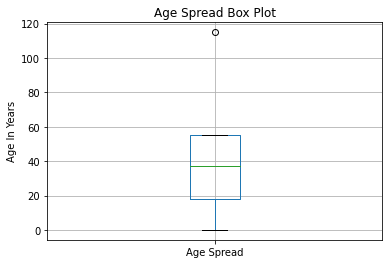

In [160]:
# plot dataframe 
df_age_spread.boxplot(column='Age Spread', return_type='axes')
plt.title("Age Spread Box Plot")
plt.ylabel('Age In Years');
df_age.describe()

## Section Conclusions

We can see that most of the population (75%) is younger than 55 years of age. The last quartile spans a much larger age range than the first 3 quartiles but only contains 25% of the sample population. 

The average age is just over 37 years old, with the youngest not even a year old and the oldest is a ripe old age of 115. 

Roughly 25% of the sample population falls between the ages of 0-18.
Roughly 25% of the sample population falls between the ages of 19-37.
Roughly 25% of the sample population falls between the ages of 38-55.
Roughly 25% of the sample population falls between the ages of 56-115.

# Investigation Final Conclusions

After an investigation into the data provided, I am able to draw some statistical conclusions.

1. The top ten least no-show neighbourhoods all have no-show values under 20%.
2. The top ten most no-show neighbourhoods all have no-show values over 20%.
3. In each top-ten graph, there is an outlier; 0% for the least no-show neighbourhoods and 100% for most no-show neighbourhoods.
4. People on the 'Scholarship' program had roughly a 5% higher no-show rate than those not on the 'Scholarship' program.
5. People suffering from 'Hipertension' had roughly a 3% lower no-show rate than those who did not have 'Hipertension.'
6. People suffering from 'Diabetes' had roughly a 2% lower no-show rate than those who did not have 'Diabetes.'
7. People who suffer from 'Alcoholism' had an almost even no-show rate compared to those who do not suffer from 'Alcoholism.'
8. Approximately 9.83% of the sample population is enrolled in the 'Scholarship' program.
9. Approximately 19.72% of the sample population suffer from 'Hipertension.'
10. Approximately 7.19% of the sample population suffer from 'Diabetes.'
11. Approximately 3.04% of the sample population suffer from 'Alcoholism.'
12. The mean age of the sample population is roughly 37 years of age.
13. Roughly 25% of the sample population falls between the ages of 0-18.
14. Roughly 25% of the sample population falls between the ages of 19-37.
15. Roughly 25% of the sample population falls between the ages of 38-55.
16. Roughly 25% of the sample population falls between the ages of 56-115.


# Limitations

The main limitation of this analysis is that the data only comprises one month worth of appointment data. The percentage of no-show appointments could be influenced by seasonal and other variables not considered in this data set. These totals could be totally different at different times of year and with no data of other months or seasons, there is no way to know how closely or far away from other time period totals our data is. It would be prudent to collect more months of data in order to compare with the data used for this investigation. 